# Project: Wrangling and Analyze Data

## Introduction

in this project, I'll take the full journey of data wrangling:
 1) Data Gathering
 2) Assessing Data
 3) Cleaning Data 

Also 
- Storing data
- Analyzing Data
- Visualizing Data
- Reporting

For [@dog_rates (WeRateDogs)](https://twitter.com/dog_rates) Twitter account that rates people's dogs with a humorous comment about the dog.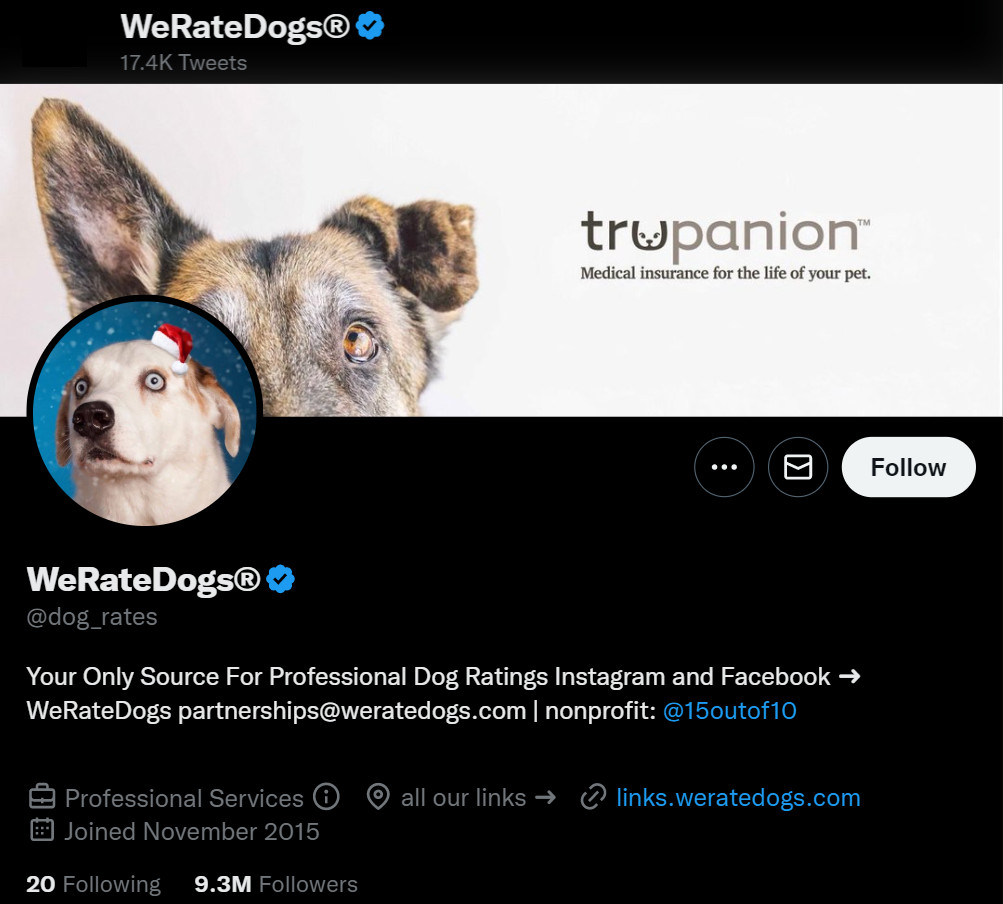

## Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image

---
---
---

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
archive_df.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response.status_code

200

In [5]:
# save response content in csv file
open('image_predictions.csv', 'wb').write(response.content)
image_predictions_df = pd.read_csv('image_predictions.csv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predictions_df.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [8]:
additional_data_df = pd.read_json('tweet-json', lines=True)
additional_data_df = additional_data_df[['id', 'retweet_count', 'favorite_count']]
additional_data_df.to_csv('additional_data.csv',index=False)
additional_data_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
additional_data_df.shape

(2354, 3)

---
---
---

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
archive_df.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

-----

In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [16]:
image_predictions_df.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

-----

In [17]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


---
---

### Quality issues

#### `twitter-archive-enhanced` table:

1. We don't need to deal with replays and retweets - Visual Assessment

---

2. Missing values in some columns - Visual Assessment -> **Completeness**

In [18]:
Image(url="qualityIssues/issue1.jpg")

----------

3. Nulls represented as None in dogs type - Visual Assessment -> **Validity**

In [19]:
Image(url="qualityIssues/issue2.jpg")

-----------

4. timestamp is a object not a DateTime - Programmatic Assessment -> **Validity**

In [20]:
Image(url="qualityIssues/issue3.jpg")

----------------

5. Wrong data in `name` column - Programmatic Assessment -> **Accuracy**

In [21]:
Image(url="qualityIssues/issue4.jpg")

----------------------------------------

#### `additional_data` table:
6. missing 2 records (2354 instead of 2356) - Programmatic Assessemnt -> **Completeness**

-----------

#### `image_predictions` table:

7. missing 281 records (2075 instead of 2356) - Programmatic Assessemnt -> **Completeness**

---

8. Wrong data - Programmatic Assessment -> **Accuracy**

In [22]:
Image(url="qualityIssues/issue7.jpg")

---

9. some value represent space as ( - ) and some represent as ( _ ) - Programmatic Assessemnt -> **Consistency**

In [23]:
Image(url="qualityIssues/issue8.jpg")

---------------------
-----------------

### Tidiness issues
#### `twitter-archive-enhanced` table:
1. Dog type values represent as column - Visual Assessment -> **each variable is column**

In [24]:
Image(url="tidinessIssues/issue1.jpg")

#### `additional_data` and `image_predictions` tables:

2. We don't need extra table for `additional_data` and `image_predictions` - Visual Assessment -> **each type of observational unit forms a table**

---
---
---

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
archive_df_copy = archive_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
additional_data_df_copy = additional_data_df.copy()

## Quality issues

### Issue #1: `archive_df_copy`: We don't need to deal with replays and retweets

#### Define
In this project, I deal with original tweet only, we don't care about replays and retweet status. 

#### Code

In [26]:
archive_df_copy = archive_df_copy[pd.isnull(archive_df_copy.retweeted_status_id)]
archive_df_copy = archive_df_copy[pd.isnull(archive_df_copy.in_reply_to_status_id)]

In [27]:
dropped_columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
archive_df_copy.drop(dropped_columns, axis=1, inplace=True);

#### Test

In [28]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


---

### Issue #2: `archive_df_copy`: Missing values in some columns

> SOLVED FROM PREVIOUS ISSUE

---

### Issue #3: `archive_df_copy`: Nulls represented as None in dogs type

#### Define
Some null values represented as None, I'll replece all None in table to null

#### Code

In [29]:
# replace all None in table to null
archive_df_copy.replace('None', np.nan, inplace=True)

#### Test

In [30]:
archive_df_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


---

### Issue #4: `archive_df_copy`: timestamp is a object not a DateTime

#### Define
I'll convert timestamp column from object (String) to DateTime object to get DateTime class benefits

#### Code

In [31]:
archive_df_copy['timestamp'] = pd.to_datetime(archive_df_copy['timestamp'])

#### Test

In [32]:
archive_df_copy['timestamp'].dtype

datetime64[ns, UTC]

---

### Issue #5: `archive_df_copy`: wrong data in name column

#### Define
there are some wrong data such 'a', so I'll display all value in `name` and put them deleted_names list
<br> NOTE: An easy solution to this is find all invalid names. They can be easily identified as they all start with lower case letters.

#### Code

In [33]:
archive_df_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
       

In [34]:
deleted_names = ['0']
for i in archive_df_copy.name:
    if isinstance(i, str):
        if i[0].islower():
            deleted_names.append(i)

In [35]:
deleted_names

['0',
 'such',
 'a',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [36]:
archive_df_copy = archive_df_copy.replace(deleted_names, np.nan)

#### Test

In [37]:
'Miley' in archive_df_copy.name.unique()

True

In [38]:
for i in deleted_names:
    print(i, i in archive_df_copy.name.unique())

0 False
such False
a False
quite False
quite False
not False
one False
incredibly False
a False
a False
very False
my False
one False
not False
his False
one False
a False
a False
a False
an False
very False
actually False
a False
just False
getting False
mad False
very False
this False
unacceptable False
all False
a False
old False
a False
infuriating False
a False
a False
a False
an False
a False
a False
very False
getting False
just False
a False
the False
the False
actually False
by False
a False
officially False
a False
the False
the False
a False
a False
a False
a False
life False
a False
one False
a False
a False
a False
light False
just False
space False
a False
the False
a False
a False
a False
a False
a False
a False
a False
a False
a False
an False
a False
the False
a False
a False
a False
a False
a False
a False
a False
a False
a False
a False
a False
quite False
a False
an False
a False
an False
the False
the False
a False
a False
an False
a False
a False
a False
a False


---

### Issue #6: `additional_data_df_copy`: missing 2 records (2354 instead of 2356)

#### Define
There are 2356 records in `archive_df_copy` and 2354 in `additional_data_df_copy`. I'm not going to fix this issue.

#### Code

In [39]:
archive_df_copy.shape[0] , additional_data_df_copy.shape[0]

(2097, 2354)

---

### Issue #7: `image_predictions_df_copy`: missing 2 records (2075instead of 2356)

#### Define
There are 2356 records in archive_df_copy and 2075 in additional_data_df_copy. I'm not going to fix this issue.

#### Code

In [40]:
archive_df_copy.shape[0] , image_predictions_df_copy.shape[0]

(2097, 2075)

---

### Issue #8: `image_predictions_df_copy`: Wrong data in some columns

#### Code

In [41]:
image_predictions_df_copy.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [42]:
p1_deleted_names = ['desktop_computer', 'toyshop', 'shopping_basket', 'bow_tie', 'window_shade', 'banana', 'stone_wall', 'street_sign', 'bow', 'stove', 'paper_towel', 'bath_towel', 'mailbox', 'sea_lion', 'grey_fox', 'cup', 'orange', 'laptop', 'coffee_mug', 'washer', 'restaurant', 'school_bus', 'prison', 'pool_table']

In [43]:
image_predictions_df_copy = image_predictions_df_copy.replace(p1_deleted_names, np.nan)

In [44]:
image_predictions_df_copy.dropna(inplace=True)

#### Test

In [45]:
for i in p1_deleted_names:
    print(i, i in image_predictions_df_copy.p1.unique())

desktop_computer False
toyshop False
shopping_basket False
bow_tie False
window_shade False
banana False
stone_wall False
street_sign False
bow False
stove False
paper_towel False
bath_towel False
mailbox False
sea_lion False
grey_fox False
cup False
orange False
laptop False
coffee_mug False
washer False
restaurant False
school_bus False
prison False
pool_table False


---

### Issue #9: `image_predictions_df_copy`: some value represent space as ( - ) and some represent as ( _ )

#### Define
Some words represent spaces between words as ( - ) and other words represent ( _ ). I'll unified to represent spaces as ( _ )

#### Code

In [46]:
image_predictions_df_copy = image_predictions_df_copy.replace('-','_', regex=True)

#### Test

In [47]:
image_predictions_df_copy.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen',
       'Italian_greyhound', 'Maltese_dog', 'three_toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft_coated_wheaten_terrier',
       'Chihuahua', 'black_and_tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly_coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'papillon', 'Saint_Bernard', 'goose',
       '

---
---
---

## Tidiness issues

### Issue #1: `archive_df_copy`: Dog type values represent as column

#### Define
Dog type values (doggo, floofer, pupper, puppo) represent as column, I'll create new column `type` and drop that columns 

#### Code

In [48]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              230 non-null    object             
 10  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


In [49]:
archive_df_copy['type'] = archive_df_copy[archive_df_copy.columns[7:]].apply(lambda x: ' OR '.join(x.dropna().astype(str)) , axis = 1)

In [50]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              230 non-null    object             
 10  puppo               24 non-null     object             
 11  type                2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [51]:
# drop (doggo, floofer, pupper, puppo)
archive_df_copy.drop(archive_df_copy.columns[7:-1], axis = 1, inplace = True)

#### Test

In [52]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   type                2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.4+ KB


In [53]:
archive_df_copy.type.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo OR puppo',
       'doggo OR floofer', 'doggo OR pupper'], dtype=object)

In [54]:
archive_df_copy.replace('', np.nan, inplace=True)

In [55]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   type                336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.4+ KB


In [56]:
archive_df_copy.type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo OR puppo',
       'doggo OR floofer', 'doggo OR pupper'], dtype=object)

---

### Issue #2: `additional_data` and `image_predictions` tables:

#### Define
We don't need extra table for additional_data and image_predictions, so I'll merge two tables to archive_df based on tweet id


#### Code

In [57]:
archive_df_copy_copy = archive_df_copy.copy()

In [58]:
# Merge additional data to archive
archive_df_copy_copy = pd.merge(archive_df_copy_copy, additional_data_df_copy, left_on='tweet_id', right_on = 'id')

In [59]:
# Merge additional data to archive
archive_df_copy_copy = pd.merge(archive_df_copy_copy, image_predictions_df_copy, on='tweet_id', how='left')

In [60]:
image_predictions_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA_lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Test

In [61]:
archive_df_copy_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   type                336 non-null    object             
 8   id                  2097 non-null   int64              
 9   retweet_count       2097 non-null   int64              
 10  favorite_count      2097 non-null   int64              
 11  jpg_url             1889 non-null   object             
 12  img_num             1889 non-null 

In [62]:
archive_df_copy_copy.drop('id', inplace=True, axis=1)

In [63]:
archive_df_copy_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   type                336 non-null    object             
 8   retweet_count       2097 non-null   int64              
 9   favorite_count      2097 non-null   int64              
 10  jpg_url             1889 non-null   object             
 11  img_num             1889 non-null   float64            
 12  p1                  1889 non-null 

---
---
---

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
archive_df_copy_copy.to_csv('twitter_archive_master.csv', index = False)

In [65]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                1390 non-null   object 
 7   type                336 non-null    object 
 8   retweet_count       2097 non-null   int64  
 9   favorite_count      2097 non-null   int64  
 10  jpg_url             1889 non-null   object 
 11  img_num             1889 non-null   float64
 12  p1                  1889 non-null   object 
 13  p1_conf             1889 non-null   float64
 14  p1_dog              1889 non-null   object 
 15  p2                  1889 non-null   object 
 16  p2_con

---
---
---

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short_haired_pointer,0.175219,True


### Insights:

1. is tweet get most `retweet_count` same tweet get most `favorite_count` ?

In [68]:
most_retweet = twitter_archive_master['retweet_count'].max()
most_retweet

79515

In [69]:
most_favorite = twitter_archive_master['favorite_count'].max()
most_favorite

132810

In [70]:
twitter_archive_master[twitter_archive_master['retweet_count'] == most_retweet][['tweet_id', 'retweet_count', 'favorite_count']]

,tweet_id,retweet_count,favorite_count
825,744234799360020481,79515,131075


In [71]:
twitter_archive_master[twitter_archive_master['favorite_count'] == most_favorite][['tweet_id', 'retweet_count', 'favorite_count']]

,tweet_id,retweet_count,favorite_count
325,822872901745569793,48265,132810


> The answer: No, tweet `744234799360020481` has most retweets and tweet `822872901745569793` has most favorites.

---

2. What's average rating?

In [72]:
twitter_archive_master['rating_numerator'].mean()

12.189318073438246

In [73]:
twitter_archive_master['rating_denominator'].mean()

10.448736289938006

> The average rating about `12` of `10`

---

3. Which dog type has most prediction?

In [74]:
twitter_archive_master.p1_conf.max()

1.0

In [75]:
twitter_archive_master.query('p1_conf == 1')['p1']

1992    jigsaw_puzzle
Name: p1, dtype: object

---
---

> The cleaning process not going will. let's drop the row

In [76]:
twitter_archive_master.drop(1992, axis=0, inplace=True)

In [77]:
twitter_archive_master.p1_conf.max()

0.999984

In [78]:
twitter_archive_master.query('p1_conf == 0.999984')['p1']

740    swing
Name: p1, dtype: object

> it's not dog, let's drop it

In [79]:
twitter_archive_master.drop(740, axis=0, inplace=True)

In [80]:
max = twitter_archive_master.p1_conf.max()
max

0.999962

In [81]:
twitter_archive_master.query('p1_conf == 0.999962')['p1']

816    barrow
Name: p1, dtype: object

> it's not dog, let's drop it


In [82]:
twitter_archive_master.drop(816, axis=0, inplace=True)

In [83]:
max = twitter_archive_master.p1_conf.max()
max

0.999956

In [84]:
twitter_archive_master.query('p1_conf == 0.999956')['p1']

1948    komondor
Name: p1, dtype: object

> PERFECT!, komondor is most predicted dog

---
---

### Visualization

Which source most tweets comes from?

In [85]:
twitter_archive_master.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [86]:
twitter_archive_master.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

There are 4 resources:<br>

- iphone
- Web
- Vine
- TweetDeck

I'll create list and put each one into it. then count each one and build bar chart

In [87]:
source = []
for i in twitter_archive_master.source:
    if 'iphone' in i:
        source.append('iphone')
    if 'Web' in i:
        source.append('Web')
    if 'Vine' in i:
        source.append('Vine')
    if 'TweetDeck' in i:
        source.append('TweetDeck')    

In [88]:
source_df = pd.DataFrame(source, columns=['source'])

In [89]:
source_df.head()

,source
0,iphone
1,iphone
2,iphone
3,iphone
4,iphone


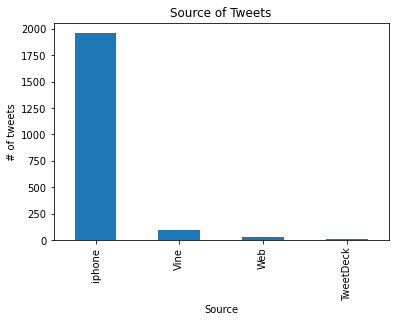

In [90]:
source_df.source.value_counts().plot(kind='bar')
plt.title('Source of Tweets')
plt.xlabel('Source')
plt.ylabel('# of tweets')
plt.show()

> From chart, we can easly determaine, the most source is **iphone**

---
---
---

# Resources
- geeksforgeeks: [Insert Image in a Jupyter Notebook](https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/)
- Real Python: [Python’s Requests Library (Guide)](https://realpython.com/python-requests/)
- Udacity: [twitter-api](https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py)
- towardsdatascience: [How to convert JSON into a Pandas DataFrame](https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8)
- STATOLOGY: [How to Fix in Python: ValueError: Trailing data](https://www.statology.org/valueerror-trailing-data/)
- edureka: [How can I replace values with none in a dataframe using pandas](https://www.edureka.co/community/584/how-can-replace-values-with-none-in-a-dataframe-using-pandas)
- stackoverflow: [Converting object to datetime format in python](https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python)
- Data to Fish: [Replace Characters in Strings in Pandas DataFrame](https://datatofish.com/replace-character-pandas-dataframe/)
- includeHelp: [Merge multiple column values into one column in Python pandas](https://www.includehelp.com/python/merge-multiple-column-values-into-one-column-in-python-pandas.aspx)
- Shane Lynn: [Learn To Merge and Join DataFrames Easily with Pandas](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/)
- : [Create a Pandas DataFrame from Lists](https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/)